In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import json

In [2]:
def TensorMinkovskog(broj_dimenzija = 4, c = 1):#c = 3 * 10e7):
    metrickiTensor = np.zeros((broj_dimenzija, broj_dimenzija))

    for i in range(broj_dimenzija):
        if i != 0:
            metrickiTensor[i, i] = 1  
        else:
            metrickiTensor[i, i] = -c ** 2
            
    return(metrickiTensor)

In [3]:
def KristoffelovSimbolSchw(R, Vr, w, Theta, broj_dimenzija = 4, brojMasaSunca = 10, G = 1 , c = 1):#c = 3 * 10e7):"""6.67408e-11,"""
    #M = 1
    M = 1
    K = np.zeros((broj_dimenzija, broj_dimenzija, broj_dimenzija))
    Rs = 2*M *G / c ** 2 
    for i in range(3):
        K[1, i, i] = dMetrickiTensordx(R, Vr, w, Theta)[1, i, i] / (1 - Rs / R)
    #K[2, 2, 2] = -dMetrickiTensordx(R, Vr, w, Theta)[2, 2, 2] 
    #for i in range(broj_dimenzija):
     #   K[i] = np.multiply(np.linalg.inv(MetrickiTensor(R)), dMetrickiTensordx(R, Vr, w)[i])
    return - K / 2

In [ ]:
def dMetrickiTensordx(R, Vr, w, Theta, broj_dimenzija = 4, brojMasaSunca = 10, G = 1, c = 1):# c = 3 * 10e7): """6.67408e-11,"""
    #M = 1#M = 2*10e30M = 2*10e30
    M = 1
    K = np.zeros((broj_dimenzija, broj_dimenzija, broj_dimenzija))
    Rs = 2*M *G / c ** 2 
    """
    ttt = Rs / (R**2) * c ** 2
    #print(ttt)
    
    xxx = -Rs / (R + Rs) ** 2
    
    """
    #print(Rs)
    Theta1 = np.arctan(Vr / (w * R + 10e-15))
    
    ttt = -Rs / R ** 2 * c ** 2
    xxx = Rs / (Rs - R) ** 2
    aax = 2 * R
    #aaa = 2 * Vr / (w + 10e-20) / R
    aaa  = np.sin(Theta - Theta1) * np.cos(Theta- Theta1)
    
    for alfa in range(broj_dimenzija):
        for i in range(broj_dimenzija):
            if alfa == 0:
                pass
            elif alfa == 1:
                if i == 0:
                    K[alfa, i, i] = ttt 
                elif i == 1:
                    K[alfa, i, i] = xxx
                else:
                    K[alfa, i, i] = aax
            if alfa == 2:
                if i == 2:
                    K[alfa, i, i] = aaa
    return  K 

In [5]:
def dTau(metrika, dx):
    #print(metrika)
    if dx.shape[0] != 1:
        dx = dx.T
    dtau = np.sqrt(-np.sum(np.multiply(metrika, np.outer(dx, dx.T))))
    return dtau
    
def dTauK(metrika, dx):
    if dx.shape[0] != 1:
        dx = dx.T
    dtau = -np.sum(np.multiply(metrika, np.outer(dx, dx.T)))
    return dtau

In [6]:
def MatricaBrzinaNaKvadrat(metrika, dX, dtauK):
    
    dV1 = dX  #dTau(metrika, dX)
    dV2 = dX  #dTau(metrika, dX)
    #Vmv = np.multiply(np.outer(dV1.T, dV2), metrika)
    Vmv = np.outer(dV1.T, dV2) / dtauK
    return Vmv 
    

In [7]:
def MetrickiTensor(R, schwarzschild = True, broj_dimenzija = 4, brojMasaSunca = 10, G = 1,   c = 1):#3 * 10e7):"""6.67408e-11,"""
    #M = 1#M = 2*10e30
    M = 1
    metrickiTensor = np.zeros((broj_dimenzija, broj_dimenzija))
    Rs = 2*M *G / c ** 2
    #print(Rs)
    schMetrika = (1 - Rs / R)
    #print(Rs)
    #print(schMetrika)
    
    metrickiTensor[0, 0] = -schMetrika * c ** 2
    metrickiTensor[1, 1] = 1 / schMetrika 
    for i in range(2, broj_dimenzija):
        metrickiTensor[i, i] = R ** 2
    
    return metrickiTensor

In [8]:
listaR = []
listaTau = []
listaV = []
listaT = []
listaTheta = []
listaX = []
listaY = []
listaXf = []
listaYf = []

listaP = []
listaI = []
listaD = []

listaE = []
listaAccr = []
listaAccf1 = []
listaAccf2 = []


r = 4
vr = 0
x = np.zeros((4))
x1 = np.zeros((4))
xNj = np.zeros((4))
dx = np.zeros((4))

vr = np.zeros((4))
vrNj = np.zeros((4))

acc = np.zeros((4))
accNj = np.zeros((4))

X1 = 0
Y1 = 0

dt = 10e-5*4
dct = dt
dx[0] = dt
x[1] = r
xNj[1] = r
x1 = np.copy(x)
dtau = 0
vr[2] = 0.01
vrNj[2] = 0.1
vx = 0
vx1 = 0
vx2 = 0
vx3 = 0
Vx1 = 0
Vy1 = 0
delta1 = 0
delta1Nj = 0
k1 = 10e-5#10e-1*3
k2 = 0#10
k3 = 0#10e-8
deltaInteg = 0
#vr[1] = 0.00001
af2 = 0
deltax = np.zeros(4)
integracija = 0
deltaIntegNj = 0
alfa = 0
alfa1 = 0




for i in range(150000):

    x[0] += dt
    
    metrika = MetrickiTensor(r)
    dtauK = dTauK(metrika, dx)

    vrNj[1] -= 1 / xNj[1] ** 2 * dt
    xNj += vrNj * dt
    v2 = MatricaBrzinaNaKvadrat(metrika, dx, dtauK)
    #dt = np.sqrt(dtau ** 2  / (1 - 2 / x[1]) + dx[1] ** 2 /(1 - 2 / x[1])**2)
     #* np.exp( - 1 / (2 - r) ** 2)
    #vr[0] = dt / dtau
    #dtau = dTau(metrika, dx)  
    r = x[1]
    ratio = 1/np.exp((x[1]-2) / 100)
    dtau = dTau(metrika, dx) * (1 - ratio) + dtau * ratio    
    #dtau = dTau(metrika, dx)
    acc = np.sum(np.multiply(KristoffelovSimbolSchw(r, vr[1], vr[2], x[2]), v2), axis = (1,2))#vr[1], vr[2], x[2]), v2), axis = (1,2))
    if i == 0:
        vr1 = vr
        acc1 = acc
        
    if i < 10:
        E0 = vr[1]**2 + (vr[2] * r) ** 2
        E0Nj = vrNj[1]**2 + (vrNj[2] * xNj[1]) ** 2
    EkNj = vrNj[1]**2
    Ek = vr[1]**2
    En = E0 + integracija *2 
    EnNj = E0 - EkNj
    deltaNj = EnNj - vrNj[2] ** 2 * r ** 2
    delta = En - vr[2] ** 2 * r ** 2
    #E0 -= deltax[1] * 0.1

    
    vr -= acc * dtau# + (acc - acc1) * dtau / 2
    deltaInteg += delta
    der = delta - delta1

    deltaIntegNj += deltaNj
    derNj = deltaNj - delta1Nj
    
    alfa = (delta * k1 + der * k2 + deltaInteg * k3) * np.sign(vr[2])
    alfaNj = (deltaNj * k1 + derNj * k2 + deltaIntegNj * k3) * np.sign(vrNj[2])

    
    vr[2]  += alfa * dtau
    vrNj[2] += alfaNj * dt
    
    alfa1 = alfa
    delta1 = delta
    delta1Nj = deltaNj
    #vr[2] -=  (vr[2]**2 / np.tan(x[2]) + vr[2] * vr[1] / r) * dtau# vr[1] * vr[2] / r * dtau 
    #if i == 1:
     #   break
    ####
    
    #vr[2] = -np.sqrt(vr[1]/ (2  * dtau * x[1]))
    #x[2] += -np.arccos(x[1] / (x[1] + vr[1] * dtau))
    
    ####
    X = np.cos(x[2]) * x[1]
    Y = np.sin(x[2]) * x[1]
    Vx = (X - X1) / dtau
    Vy = (Y - Y1) / dtau
    ax = (Vx - Vx1) / dtau
    ay = (Vy - Vy1) / dtau
    Vx1 = Vx
    Vy1 = Vy
    
    X1 = X
    Y1 = Y
    
    vx = np.sqrt(Vx ** 2 + Vy ** 2)# + r ** 2 * vr[2] ** 2)
    
    vx2 = np.sqrt(Vx ** 2 + Vy ** 2)
    #print("realno = ", accr,"teoretsko = ", acc[1])#,"nesto = ", r ** 2 * vr[2] ** 2, "nesto2 = ", np.sqrt(vr[1]**2 + r ** 2 * vr[2] ** 2))
    accr2 = (vx - vx1) / dtau 
    #print("accr2 = ", accr2)
    accr = (vx - vx1) / dtau  
    vx1 = vx
    vx3 = vx2

    deltax = (vr * dtau  + (vr - vr1) * dtau / 2)
    x += deltax
    af2 =  -vr[1] * acc[1] / (vr[2] * r ** 2)
    ac = vr[2]  ** 2  * r
    
    vr1 = vr
    acc1 = acc
    #listaR.append(KristoffelovSimbolSchw(r, 0, 0)[1, 0, 0] * dt * dt / dtau)
    listaR.append(x[1])
    listaTau.append(vrNj[2])
    integracija += acc[1] * deltax[1]
    listaV.append(xNj[2])
    listaT.append(vr[1] ** 2 + vr[2] ** 2 * r**2)
    listaTheta.append(x[2])
    listaX.append(X)
    listaY.append(Y)

    
    listaAccr.append(Vy)
    listaAccf1.append(ac)
    listaAccf2.append(af2)
    listaP.append(alfaNj)
    listaI.append(alfa)
    listaD.append(der)

    
    listaE.append(vr[1] ** 2 + (vr[2] * r) ** 2)

   
    
    if i % 10000 == 0:
        #print(i, dt, x[1], (vr * dtau)[1], dtau )
        print(i, dtau,  x[1], x[2], vr[2], listaX[-1])#dx[1]/dt, np.sum(np.multiply(KristoffelovSimbolSchw(r, 0, 0), MatricaBrzinaNaKvadrat(metrika, x, x1, dtau)), axis = (1,2))[1])
    #x[2] = np.arctan(vr[1] / vr[2] / r)
    dx = x - x1
    
    #vr = dx / dtau
    if i == 31000:
        break
    x1 = np.copy(x)
        #pass
    
np.multiply(metrika, np.outer(dx, dx.T))

0 5.600660952513391e-06 3.9999999999921583 5.6006609525133915e-08 0.01 4.0
10000 0.00015074192913472288 3.219555055103298 0.023245731208407654 0.009962688189504304 3.21880583496105
20000 2.191115170203673e-05 2.3013998864726246 0.03053882310641477 0.009837373208590624 2.3003786799473893
30000 1.8260945217728537e-06 2.046541971642068 0.03131120165810216 0.009750520330108309 2.045547941098672


array([[-3.00481930e-09, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00,  3.00312939e-09, -0.00000000e+00,
        -0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  9.77807192e-16,
         0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

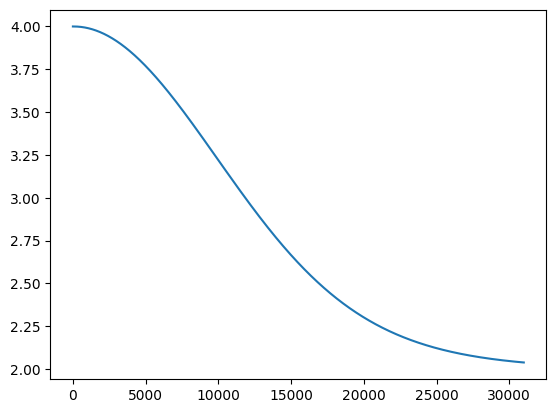

In [9]:
plt.plot(listaR)